In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans   
from sklearn import metrics 
import warnings 
warnings.filterwarnings("ignore")

In [20]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/mall_customers.csv")

In [21]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [22]:
df=df.drop(['ID'], axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


<function matplotlib.pyplot.show(close=None, block=None)>

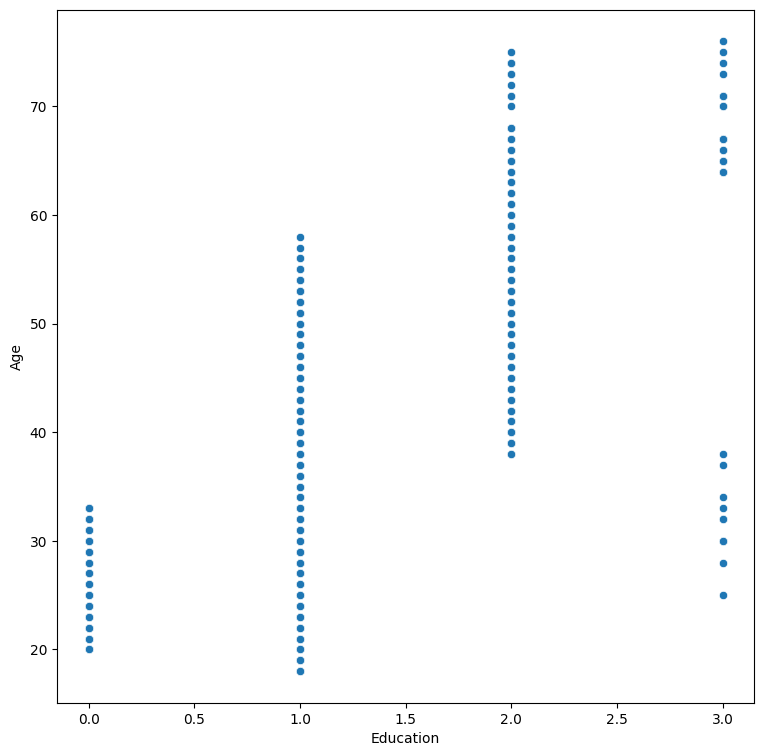

In [24]:
plt.figure(figsize=(9,9))
sns.scatterplot(data=df,x='Education', y='Age')
plt.show

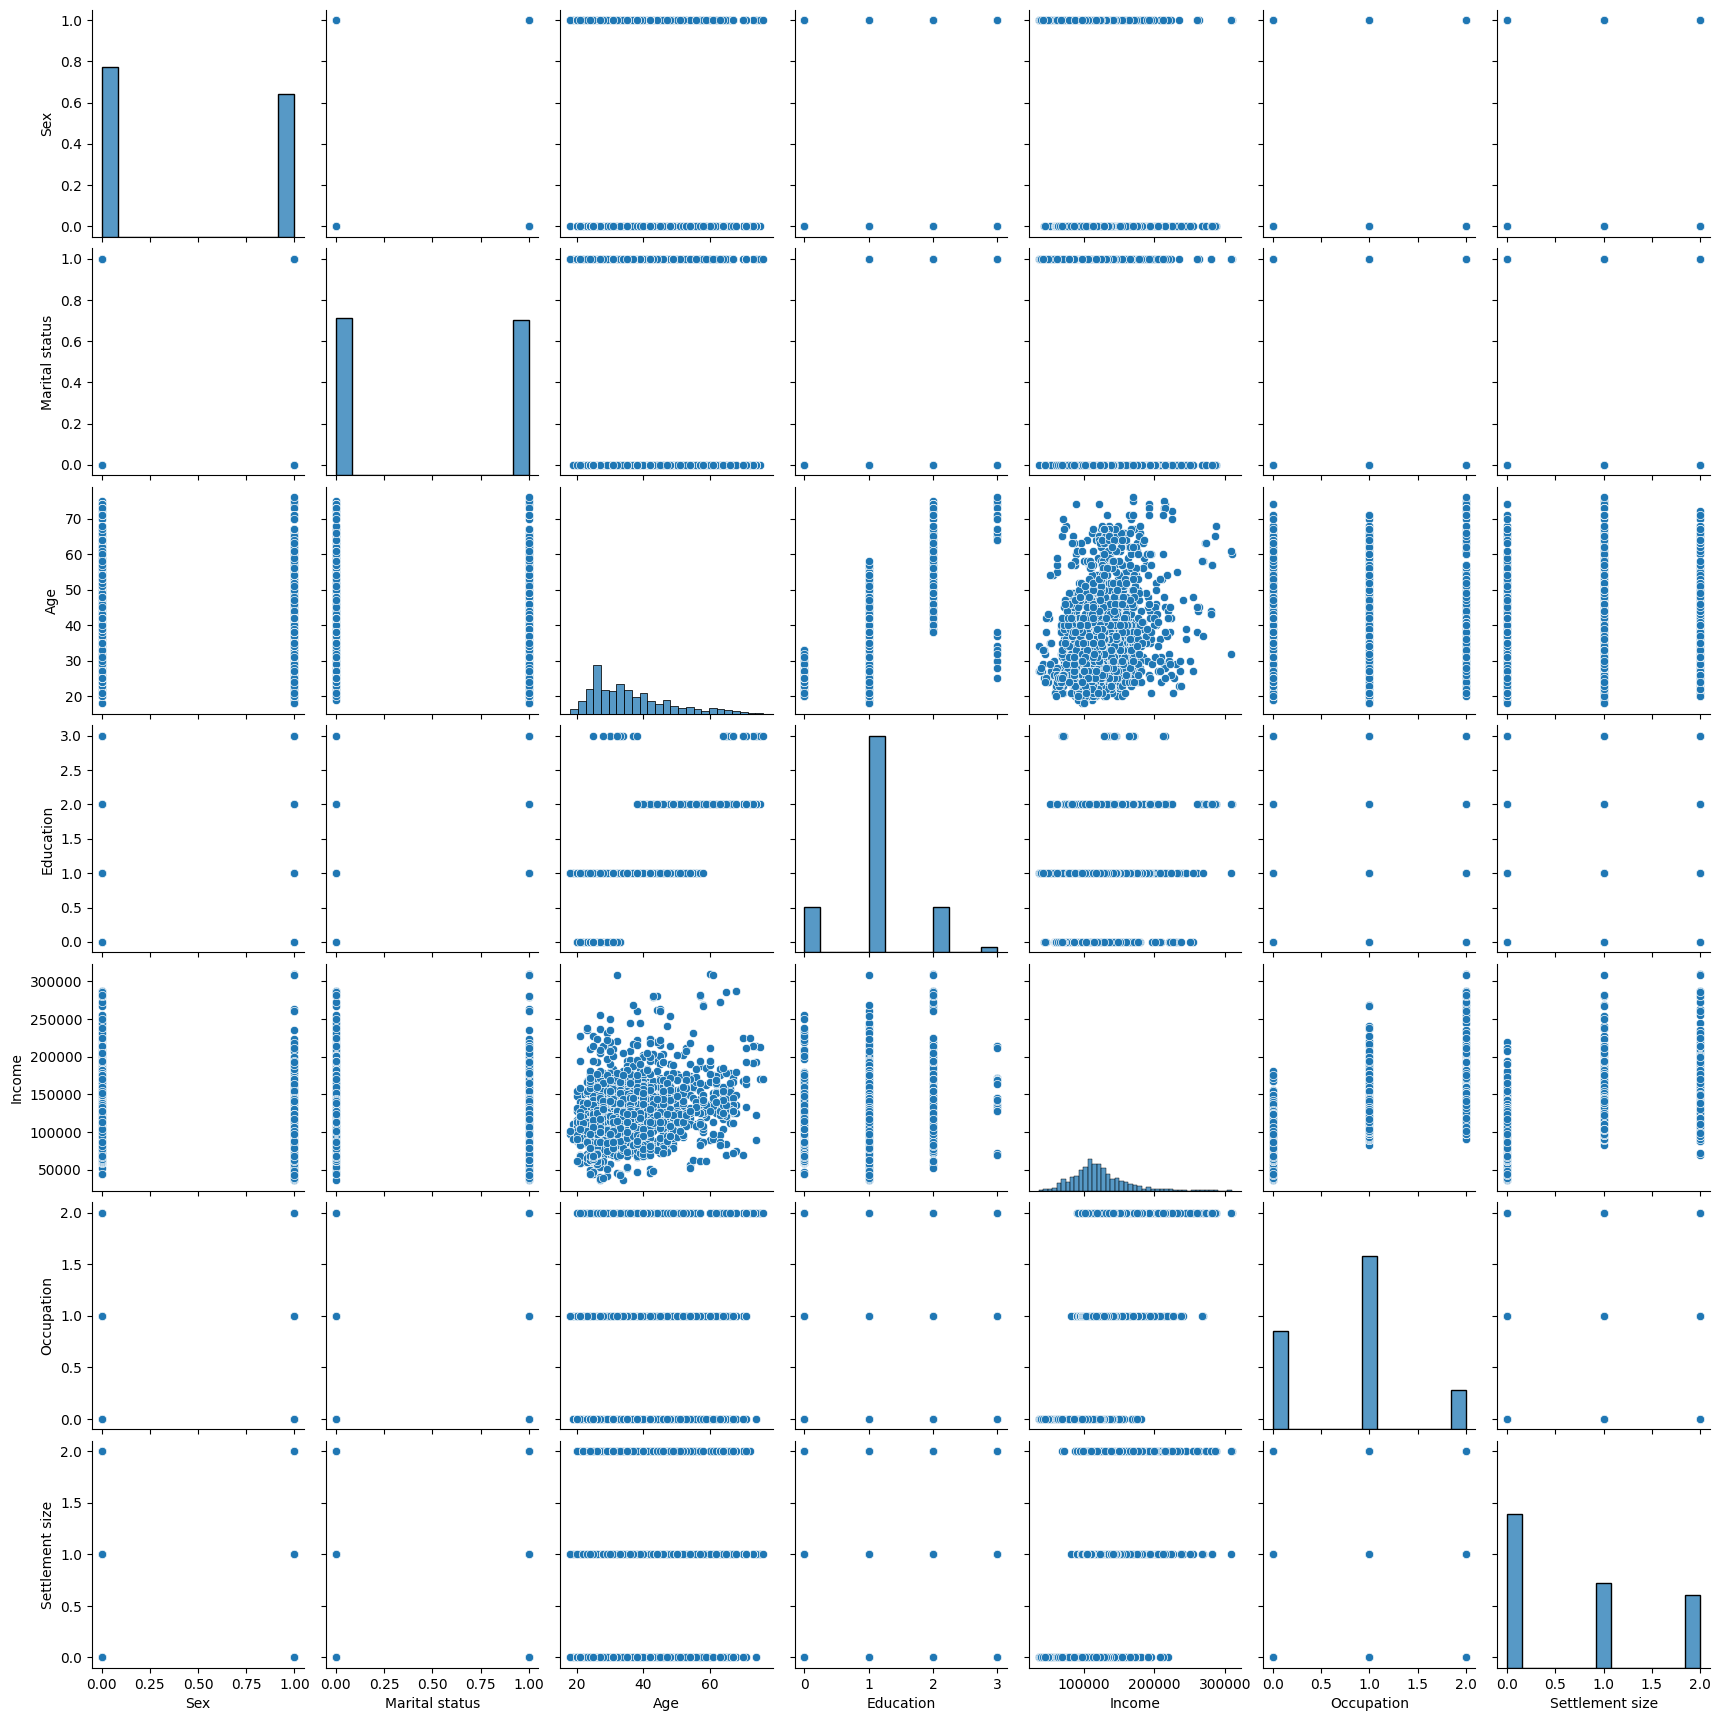

In [25]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

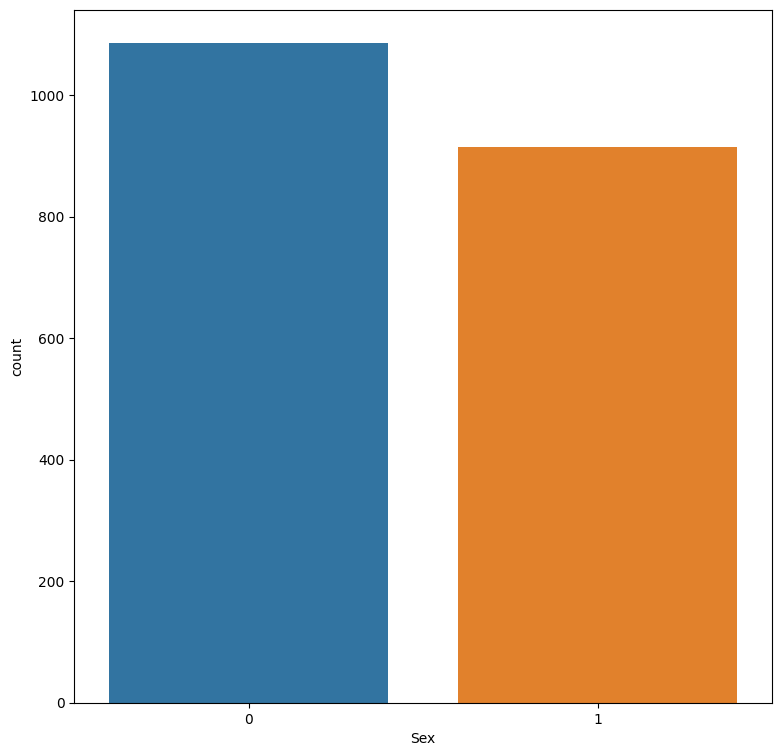

In [26]:
plt.figure(figsize=(9,9))
sns.countplot(x='Sex',data=df)
#Slightly more male customers than females

<Axes: xlabel='Education', ylabel='count'>

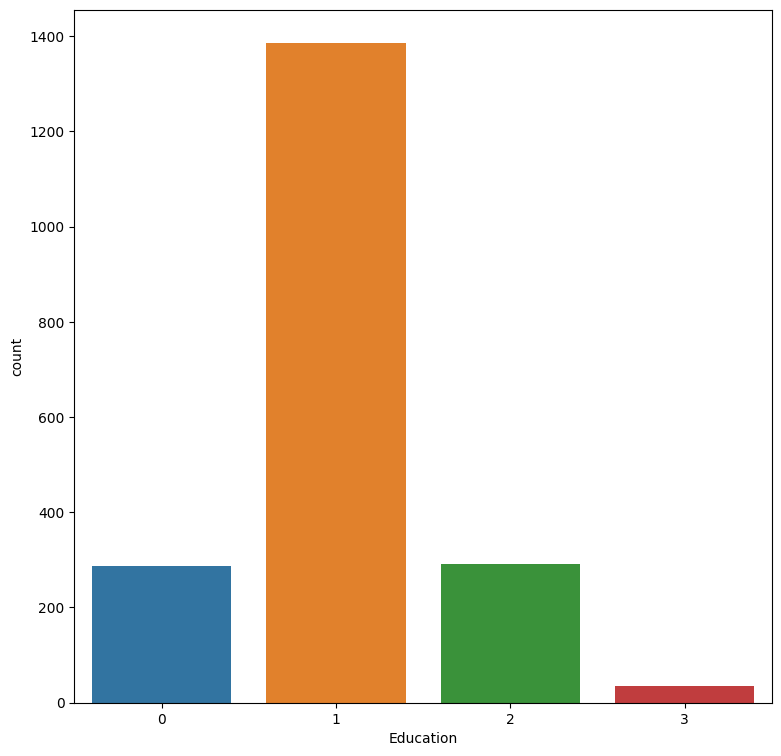

In [27]:
plt.figure(figsize=(9,9))
sns.countplot(x='Education',data=df)
#High school graduates shoo=p the most

<Axes: xlabel='Marital status', ylabel='count'>

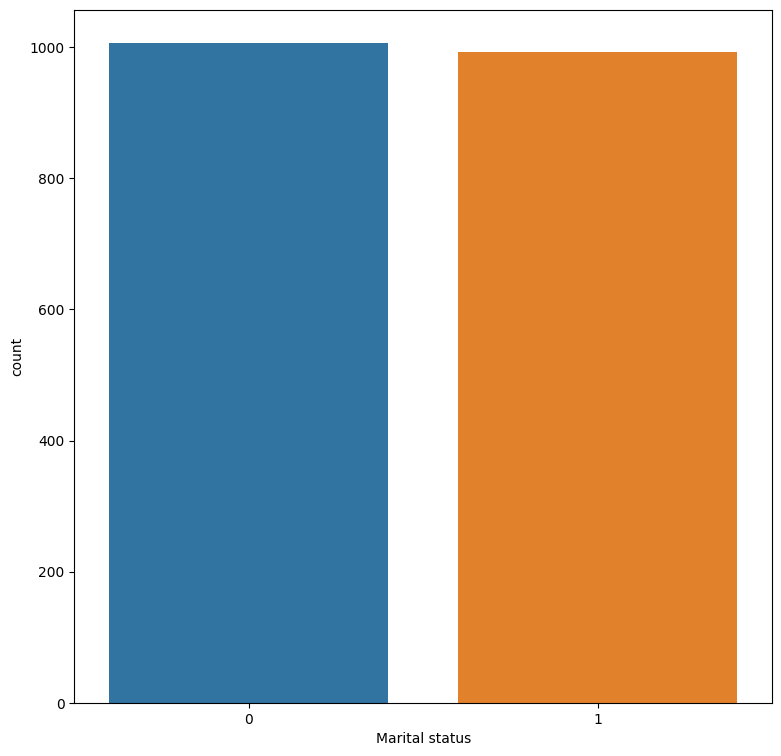

In [28]:
plt.figure(figsize=(9,9))
sns.countplot(x='Marital status',data=df)
#Equal number of married/divorced/widowed and unmarried people shop

<Axes: xlabel='Occupation', ylabel='count'>

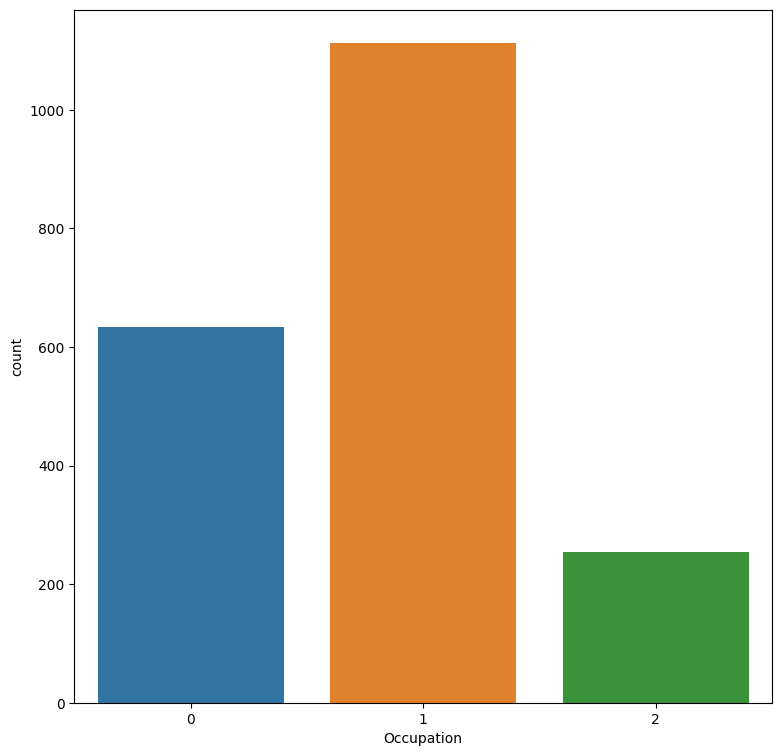

In [29]:
plt.figure(figsize=(9,9))
sns.countplot(x='Occupation',data=df)
#More skilled employees shop than unskilled or self employed

<Axes: xlabel='Settlement size', ylabel='count'>

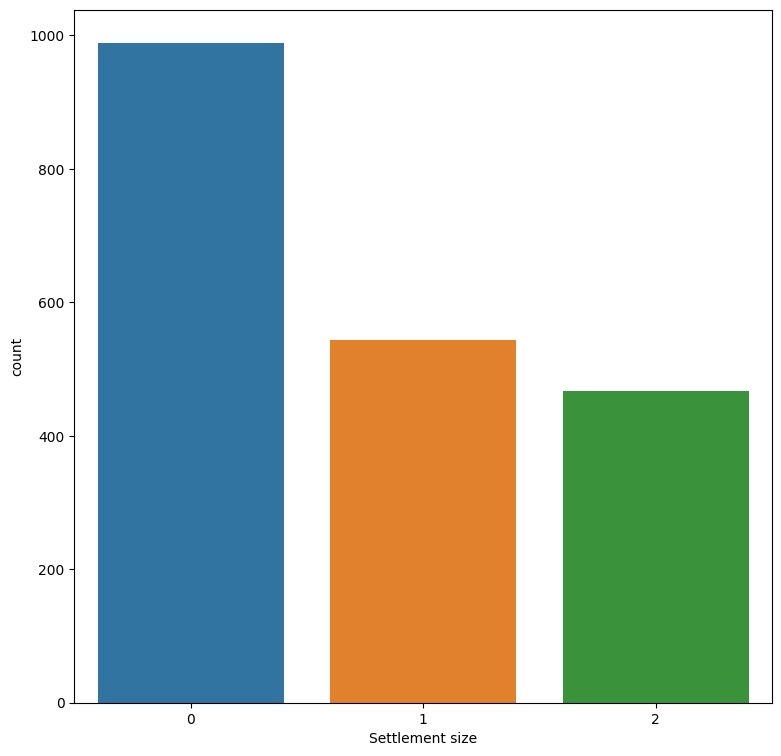

In [30]:
plt.figure(figsize=(9,9))
sns.countplot(x='Settlement size',data=df)
#More customers from people coming from small cities rather than medium or large cities

In [36]:
df1=df[['Age','Income']]
df1.head()

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


In [55]:
from sklearn.cluster import KMeans
sse=[]
for i in range(1,6):
 kmeans = KMeans(n_clusters=i)
 kmeans.fit(df1) 
 sse.append(kmeans.inertia_)


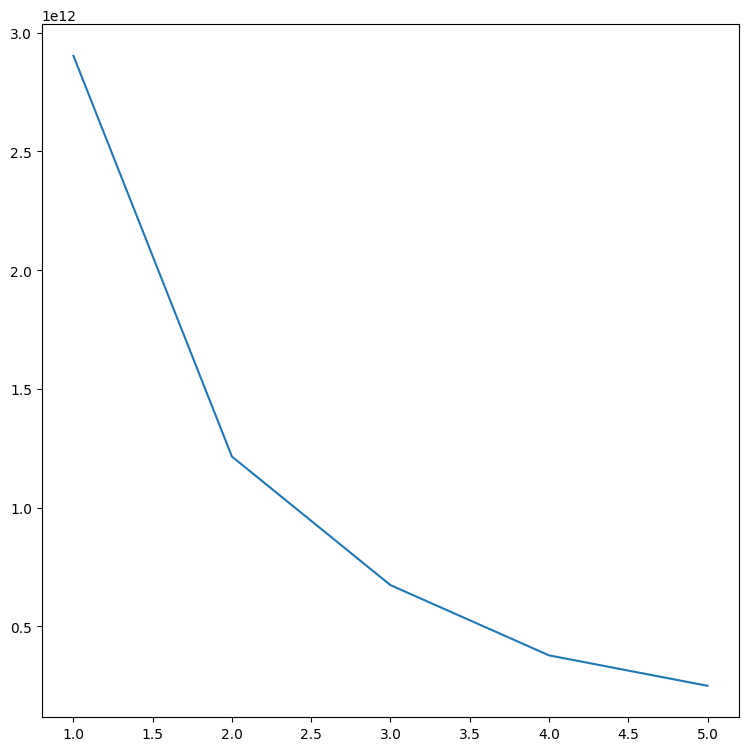

In [56]:
plt.figure(figsize=(9,9))
plt.plot(range(1,6),sse)
plt.show()

In [57]:
import sklearn.cluster as cluster
km=cluster.KMeans(n_clusters=3)
kms=km.fit(df1)
df1['clusters']=kms.labels_

In [59]:
df1.head()

,Age,Income,clusters
0,67,124670,1
1,22,150773,1
2,49,89210,0
3,45,171565,2
4,53,149031,1


In [60]:
kms.cluster_centers_

array([[3.19528736e+01, 9.03934207e+04],
       [3.77314917e+01, 1.31283906e+05],
       [4.38755556e+01, 1.97576120e+05]])

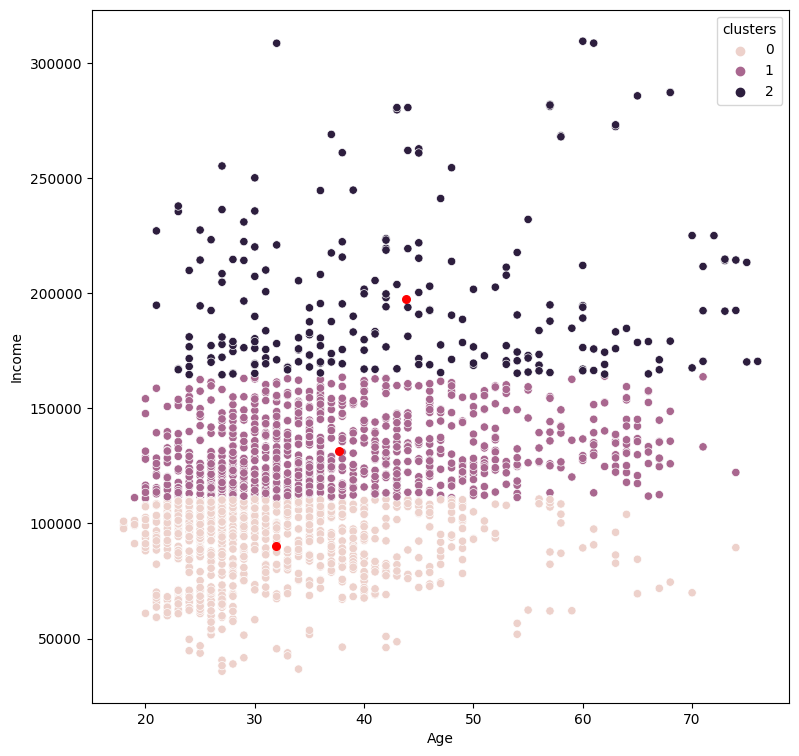

In [65]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='Age',y='Income',hue='clusters',data=df1)
plt.scatter(kms.cluster_centers_[:,0],kms.cluster_centers_[:,1],s=30,c='r')
plt.show()